In [18]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
X, y=mnist['data'],mnist['target']

In [7]:
X.shape

(70000, 784)

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
y.shape

(70000,)

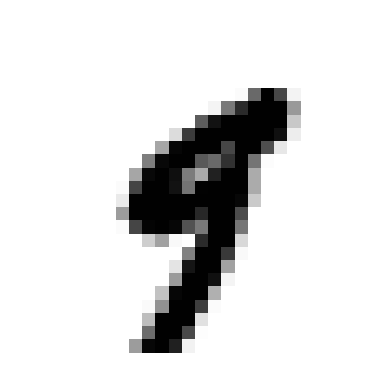

In [16]:
some_digit=X.iloc[36000].to_numpy()
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='auto')
plt.axis('off')
plt.show()

In [34]:
y[36000]

'9'

In [11]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [14]:
help(sklearn.utils._bunch.Bunch)

Help on class Bunch in module sklearn.utils._bunch:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __dir__(self)
 |      Default dir() implementation.
 |
 |  __getattr__(self, key)
 |
 |  __getitem__(self, key)
 |      Return self[key].
 |
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __setattr__(self, key, value)
 |      Impleme

In [17]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [21]:
X_train,X_test,y_train,y_test=X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy()

In [22]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [33]:
y_train_5=(y_train=='5')

In [34]:
y_test_5=(y_test=='5')

In [25]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [36]:
np.sum(y_train_5==True)

np.int64(5421)

In [62]:
some_digit=X_train[6]
sgd_clf.predict([some_digit])

array([ True])

In [66]:
from sklearn.model_selection import cross_val_score


In [68]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.96415, 0.9412 , 0.9645 ])

In [69]:
from sklearn.base import BaseEstimator

In [70]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [71]:
never_5_clf=Never5Classifier()

In [73]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9103 , 0.9095 , 0.90915])

In [74]:
from sklearn.model_selection import cross_val_predict

In [75]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_train_5,y_train_pred)

array([[53219,  1360],
       [ 1243,  4178]])

In [78]:
from sklearn.metrics import precision_score,recall_score

In [79]:
precision_score(y_train_5,y_train_pred)

0.7544239797760924

In [81]:
recall_score(y_train_5,y_train_pred)

0.770706511713706

In [82]:
from sklearn.metrics import f1_score

In [83]:
f1_score(y_train_5,y_train_pred)

0.7624783283146273

In [84]:
y_scores=sgd_clf.decision_function([some_digit])

In [85]:
y_scores

array([3453.5667171])

In [89]:
threshold=4000

In [90]:
y_some_digit_pred=(y_scores>threshold)

In [91]:
y_some_digit_pred

array([False])

In [92]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')